In [9]:
import sys
# setting path
sys.path.append('../')

import pandas as pd
import matplotlib.pyplot as plt

In [10]:
MAIN_PATH = "/work/work_fran/Deep_Var_BCD/"
HISTORY_PATH = MAIN_PATH + "history/"
MODEL_NAME = "0pe_224ps_0.1theta_0.05sigmaRui_60000nsamples"

history_file = HISTORY_PATH + MODEL_NAME + ".csv"

In [11]:
df = pd.read_csv(history_file)
df.head()

,epoch,train_loss,train_loss_mse,train_loss_kl,train_mse_rec,train_psnr_rec,train_ssim_rec,val_loss,val_loss_mse,val_loss_kl,val_mse_rec,val_psnr_rec,val_ssim_rec
0,1,0.039411,0.000327,0.391167,0.000360,25.431852,0.945117,0.000271,0.000203,0.000886,0.000239,27.049985,0.959381
1,2,0.000240,0.000196,0.000635,0.000237,25.872917,0.966127,0.000224,0.000196,0.000477,0.000245,26.898362,0.962396
2,3,0.000211,0.000192,0.000387,0.000233,25.924271,0.967778,0.000208,0.000193,0.000339,0.000232,27.308701,0.964098
3,4,0.000199,0.000190,0.000274,0.000232,25.938451,0.968288,0.000200,0.000192,0.000266,0.000231,27.296191,0.964761
4,5,0.000190,0.000189,0.000200,0.000230,25.951335,0.968548,0.000195,0.000191,0.000232,0.000226,27.568040,0.965070


In [17]:
def plot_metric(df, metric, title=None):
    plt.plot(df['train_' + metric], label='train')
    plt.plot(df['val_' + metric], label='validation')
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    plt.legend()
    if title is not None:
        plt.title(title)

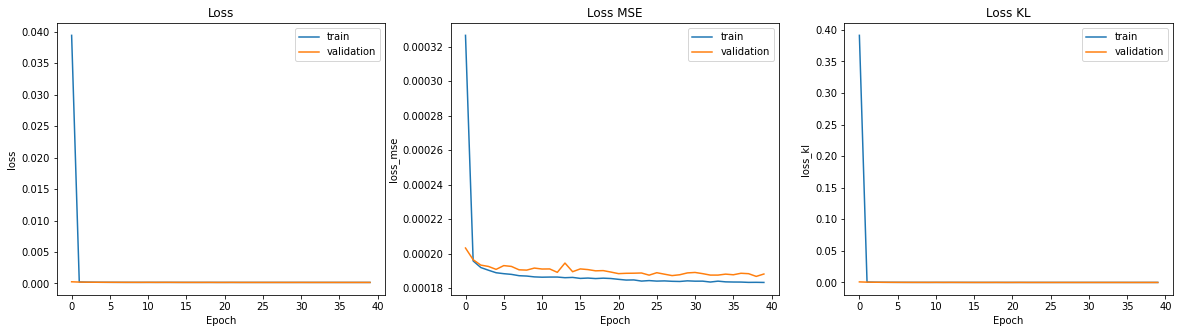

In [32]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plot_metric(df, 'loss', title='Loss')
plt.subplot(1, 3, 2)
plot_metric(df, 'loss_mse', title='Loss MSE')
plt.subplot(1, 3, 3)
plot_metric(df, 'loss_kl', title='Loss KL')
plt.show()